<a href="https://colab.research.google.com/github/NNaveenKV2348535/NNaveenKV2348535/blob/main/2348535_ML_Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Importing the libraries**

In [28]:
import pandas as pd
import numpy as np
from matplotlib.cm import datad
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score ,f1_score,confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA


# **2. Importing the dataset**

In [54]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML/Lab Files/Churn_Modelling.csv')
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#  **3.Data PreProcessing**

In [45]:
# returns description of the data
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [46]:
#info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [4]:
# returns a DataFrame object
#where all the values are replaced with a Boolean
#value True for NULL values, and otherwise False
print(df.isnull().sum()) #no missing values

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [5]:
df[df.duplicated()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [42]:
df = df.drop(columns=["RowNumber","Surname","CustomerId"])

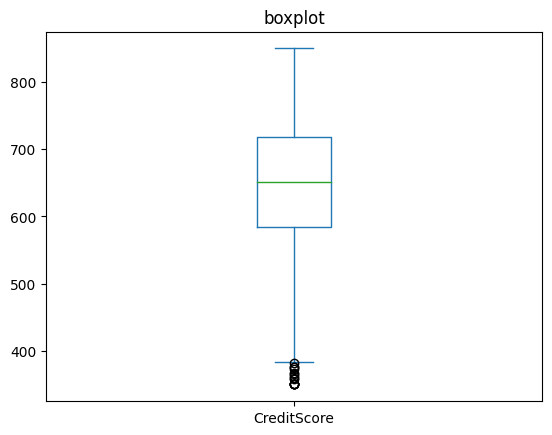

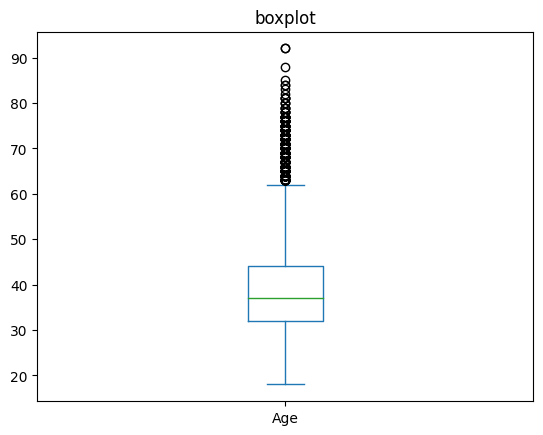

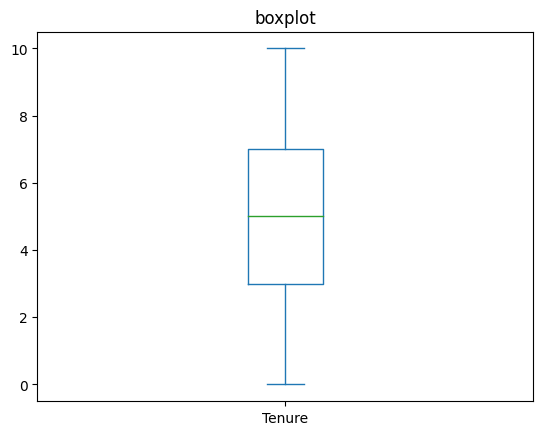

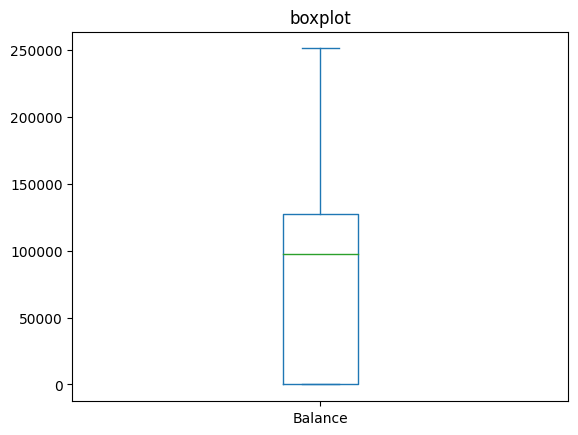

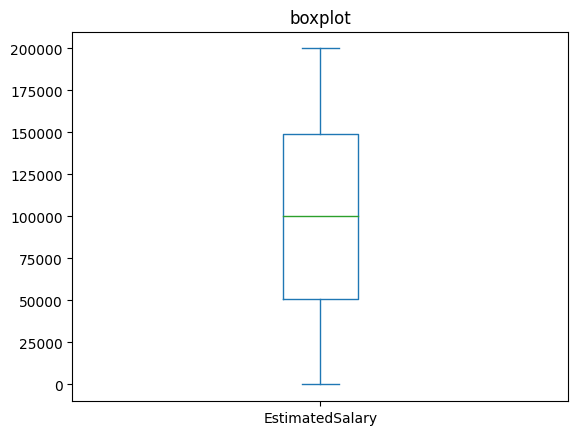

In [15]:
df = df.drop(columns=["Geography","Gender","NumOfProducts","HasCrCard","IsActiveMember","Exited"])
for cols in df:
  a = df[cols].plot(kind='box', title='boxplot')
  plt.show()

In [19]:
# Assuming you have already loaded and preprocessed the dataset.

# Calculate quartiles and IQR for the 'Age' column
Q1 = df["Age"].quantile(0.25)
Q3 = df["Age"].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for identifying outliers using IQR method
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Apply outlier detection and replace outliers with upper and lower bounds
df["Age"] = np.where(df["Age"] > upper_bound, upper_bound,
                     np.where(df["Age"] < lower_bound, lower_bound, df["Age"]))

# Now 'Age' column contains values with outliers replaced by the bounds


In [20]:
# Assuming you have already loaded and preprocessed the dataset.

# Calculate quartiles and IQR for the 'CreditScore' column
Q1 = df["CreditScore"].quantile(0.25)
Q3 = df["CreditScore"].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for identifying outliers using IQR method
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Apply outlier detection and replace outliers with upper and lower bounds
df["CreditScore"] = np.where(df["CreditScore"] > upper_bound, upper_bound,
                     np.where(df["CreditScore"] < lower_bound, lower_bound, df["Age"]))

# Now 'Age' column contains values with outliers replaced by the bounds


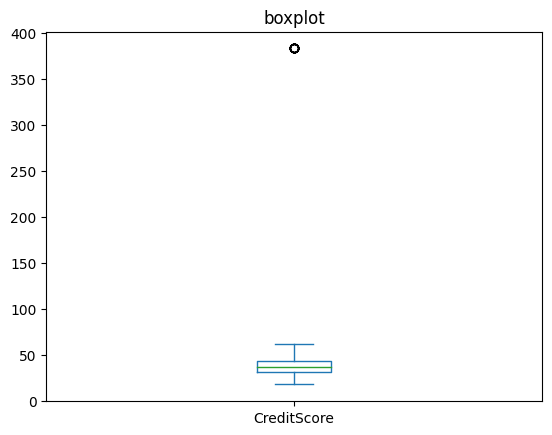

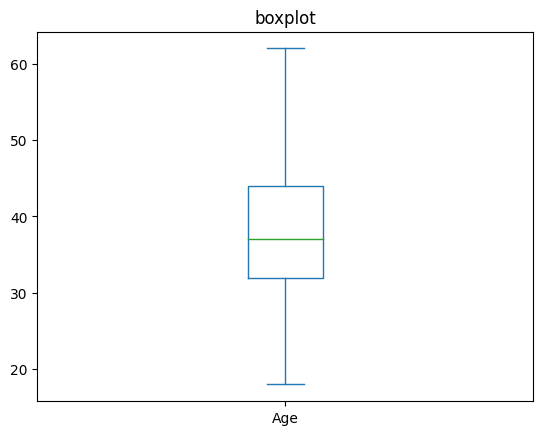

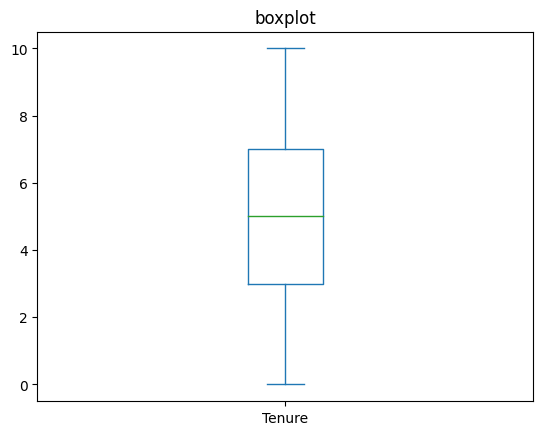

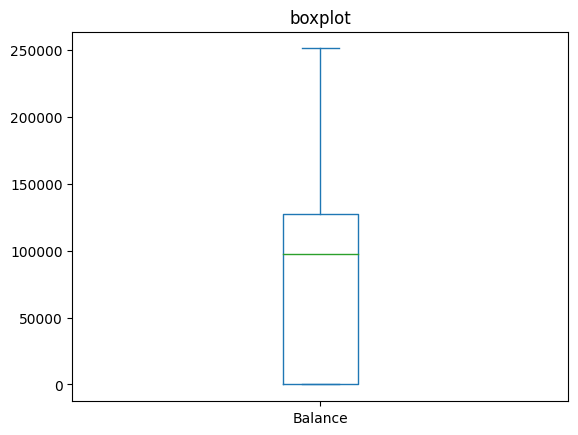

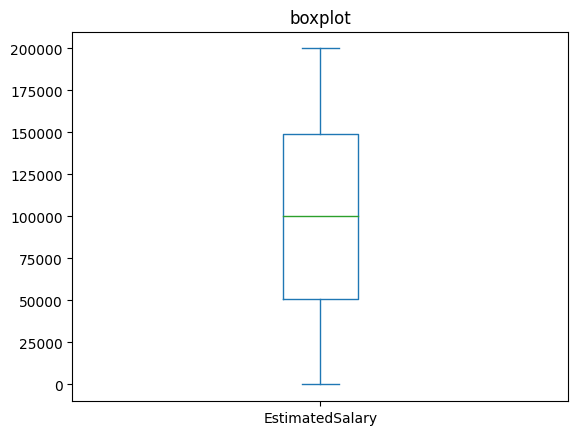

In [24]:
for cols in df:
  a = df[cols].plot(kind='box', title='boxplot')
  plt.show() #outliers have been treated

#  **4. EDA**

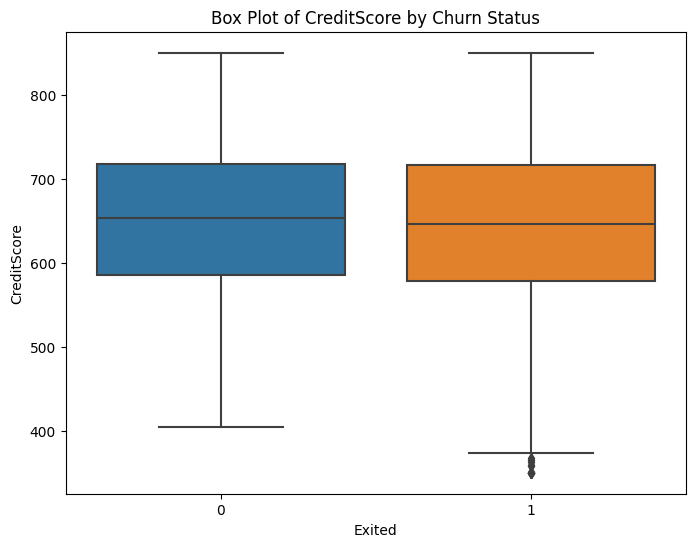

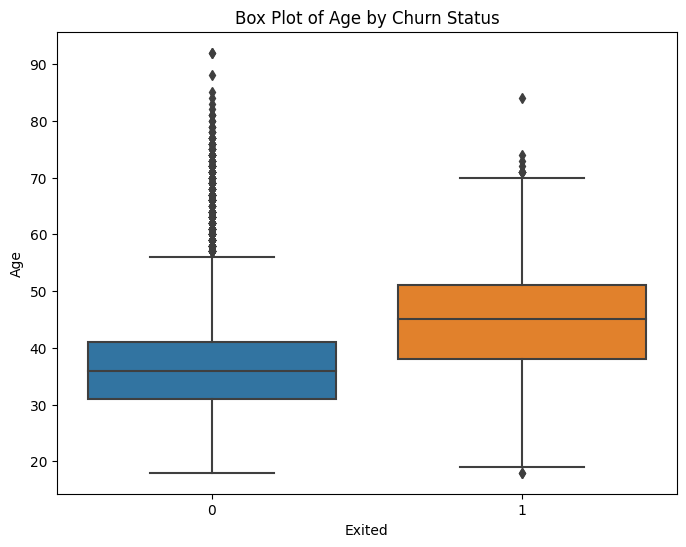

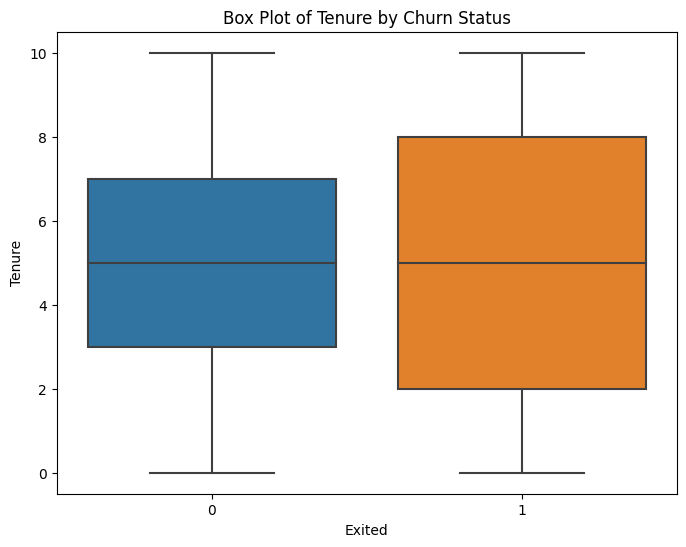

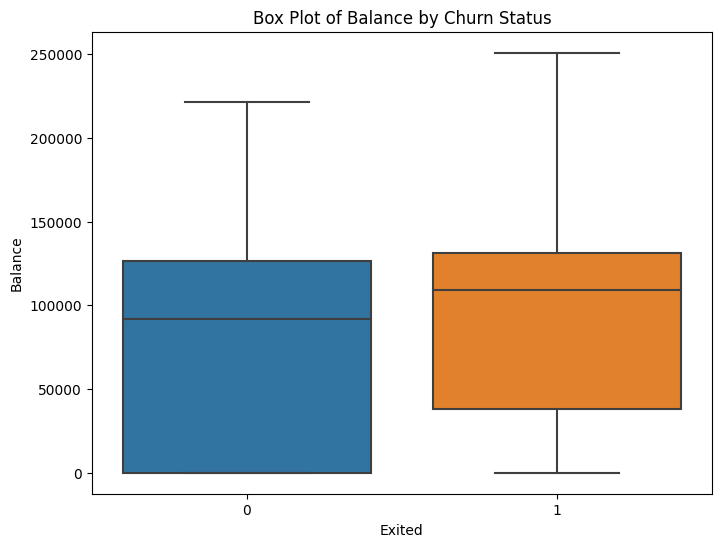

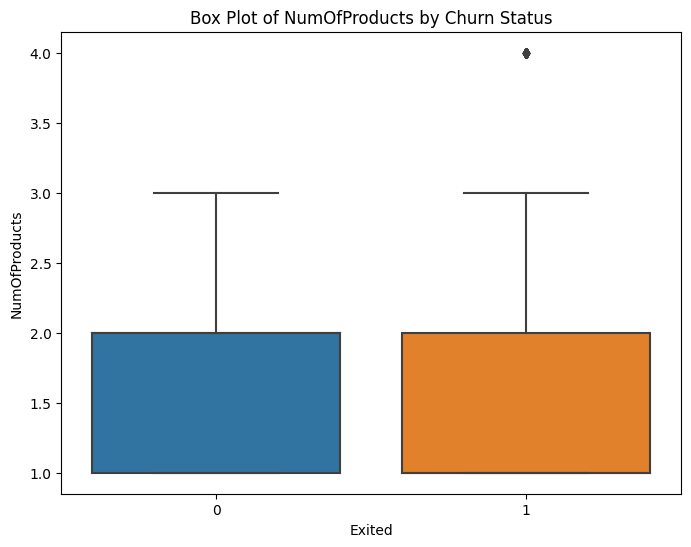

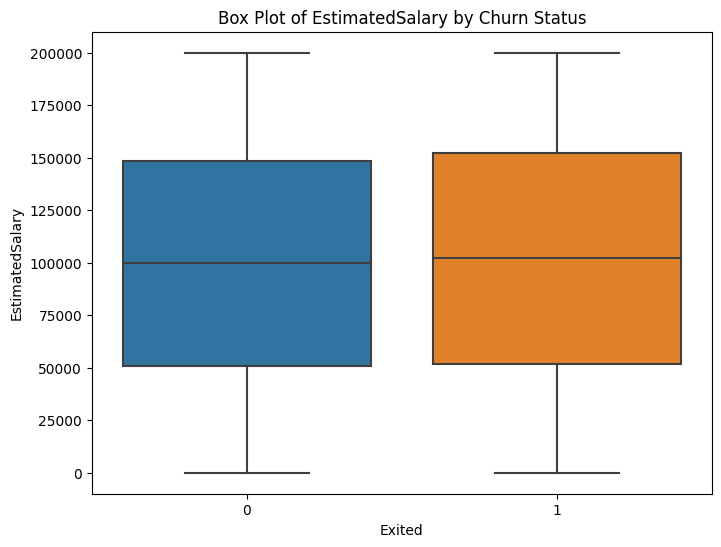

In [82]:
# Box plot for numerical variables and Churn Status
numerical_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Exited', y=col, data=df)
    plt.title(f"Box Plot of {col} by Churn Status")
    plt.show()

<ipython-input-83-eeced872e74e>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='Exited', data=df, ci=None)


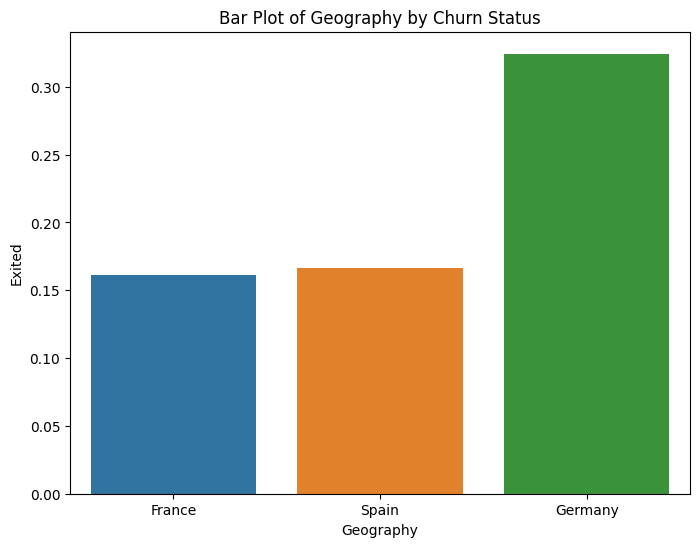

<ipython-input-83-eeced872e74e>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='Exited', data=df, ci=None)


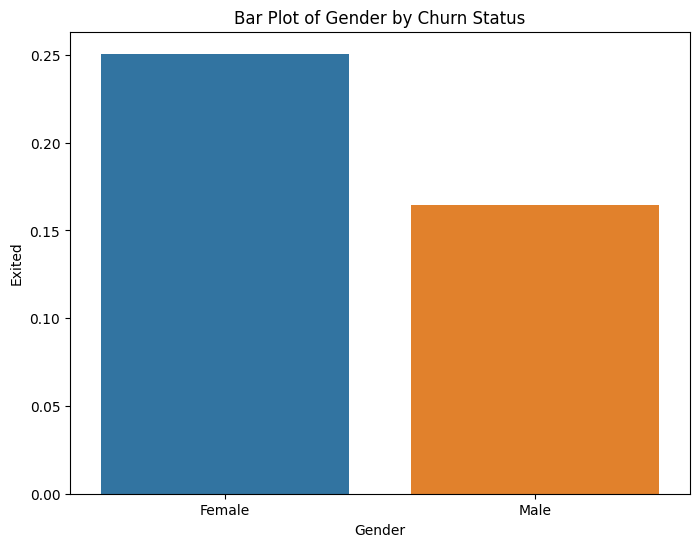

<ipython-input-83-eeced872e74e>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='Exited', data=df, ci=None)


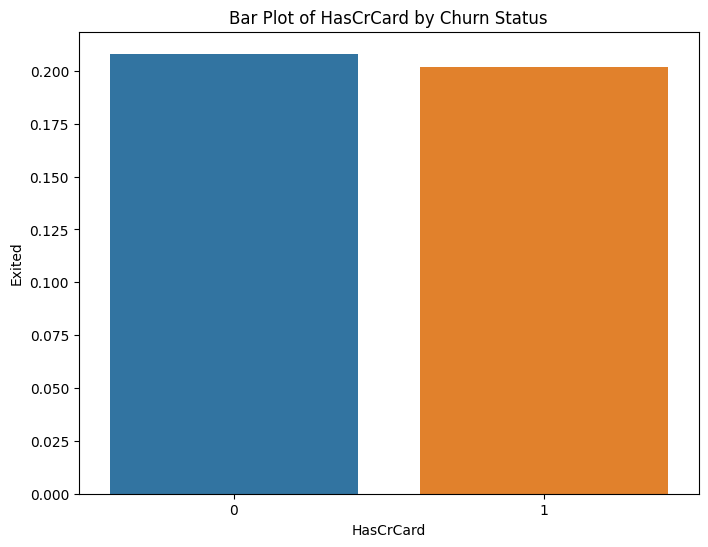

<ipython-input-83-eeced872e74e>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='Exited', data=df, ci=None)


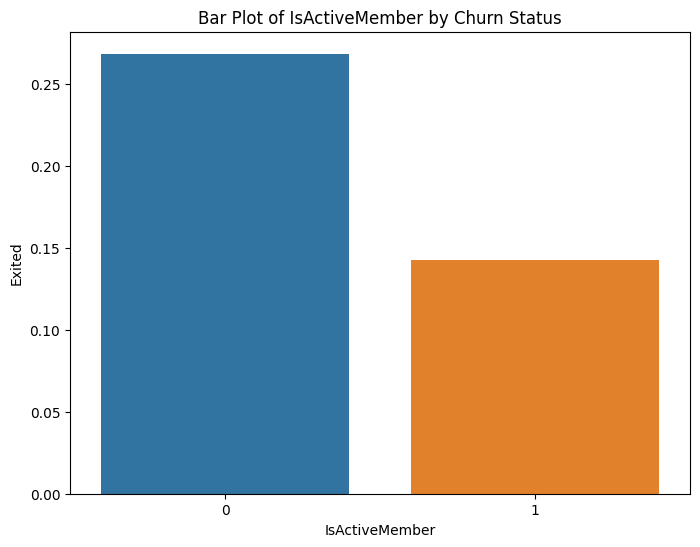

In [83]:
# Bar plot for categorical variables and Churn Status
categorical_columns = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']
for col in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.barplot(x=col, y='Exited', data=df, ci=None)
    plt.title(f"Bar Plot of {col} by Churn Status")
    plt.show()

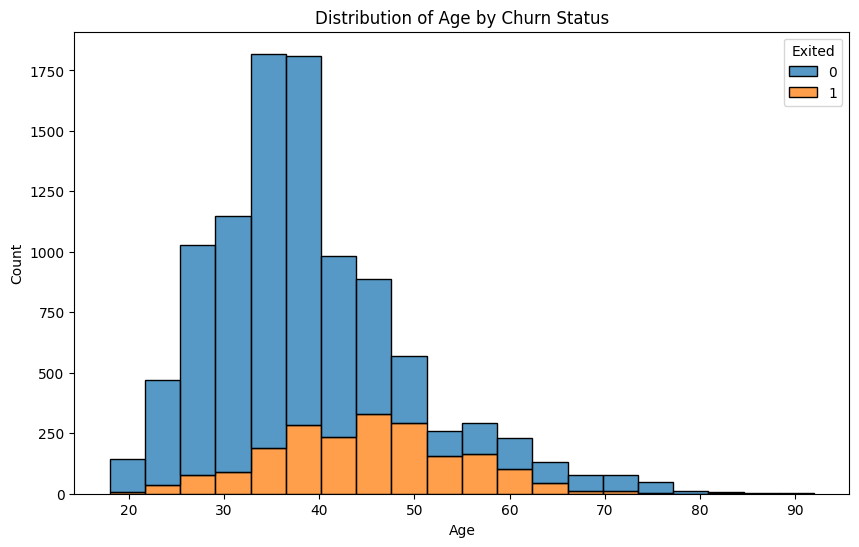

In [84]:
# Distribution of Age by Churn Status
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Exited', multiple='stack', bins=20)
plt.title("Distribution of Age by Churn Status")
plt.show()

#  **5. Binning**

In [98]:
# Define the categories and age ranges for binning
Cate = ["Adult", "Senior Adult"]
age_bins = [0, 50, 70]

# Apply binning to the 'Age' column and create a new categorical column 'Age_Category'
df['Age_Category'] = pd.cut(df['Age'], bins=age_bins, labels=Cate)
df # Now the 'Age' column has been categorized into 'Age_Category'



,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Total_Products,Age_Category
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,101348.88,1,One product,Adult
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,0,1,112542.58,0,One product,Adult
2,3,15619304,Onio,502,France,Female,42,8,159660.80,1,0,113931.57,1,More Than 2 Products,Adult
3,4,15701354,Boni,699,France,Female,39,1,0.00,0,0,93826.63,0,Two Products,Adult
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,79084.10,0,One product,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,1,0,96270.64,0,Two Products,Adult
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,101699.77,0,One product,Adult
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,0,1,42085.58,1,One product,Adult
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,1,0,92888.52,1,Two Products,Adult


In [51]:
df["Exited"].replace({0:"No",1:"Yes"},inplace=True)

In [101]:
# Define a function for creating a count plot
def countplot_by_churn(column):
    plt.figure(figsize=(10, 5))
    ax = sns.countplot(x=column, data=df, hue="Exited", palette="Set2")
    plt.title(f"Customer Churned by {column}", fontweight="bold", size=22, pad=20)
    plt.legend(title="Churned", labels=["No", "Yes"])  # Customize legend labels
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.show()

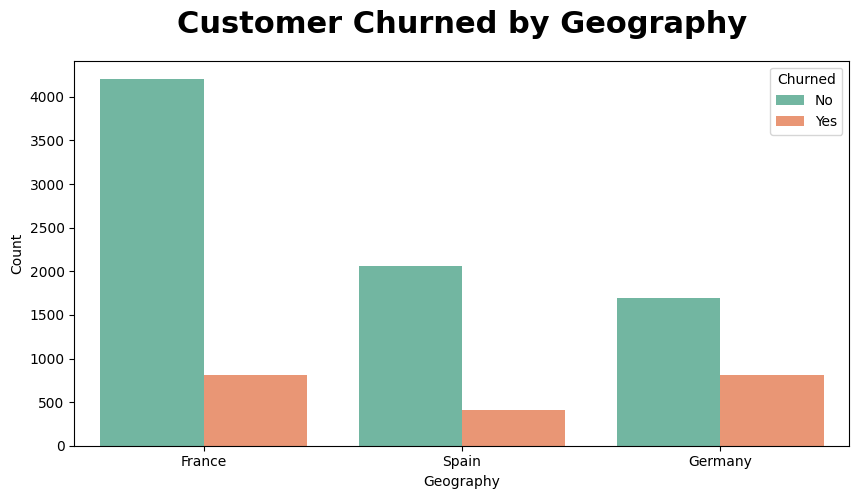

In [102]:
# Call the function with the desired categorical column
countplot_by_churn("Geography")

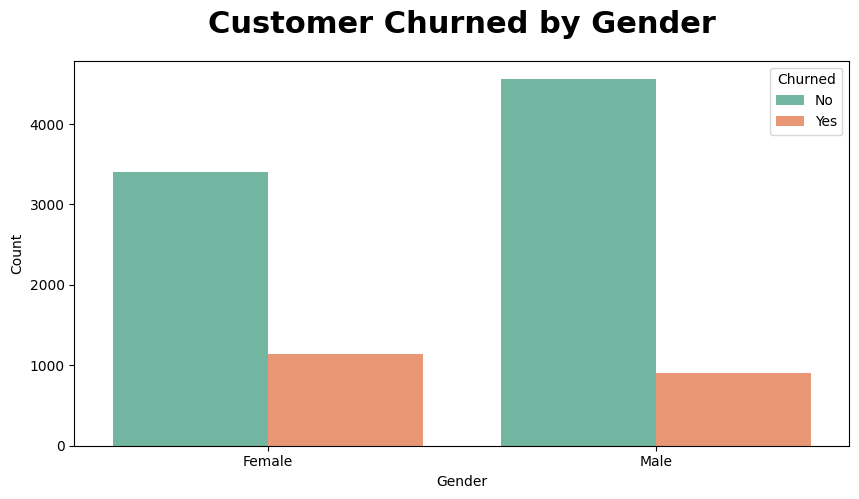

In [103]:
countplot_by_churn("Gender")

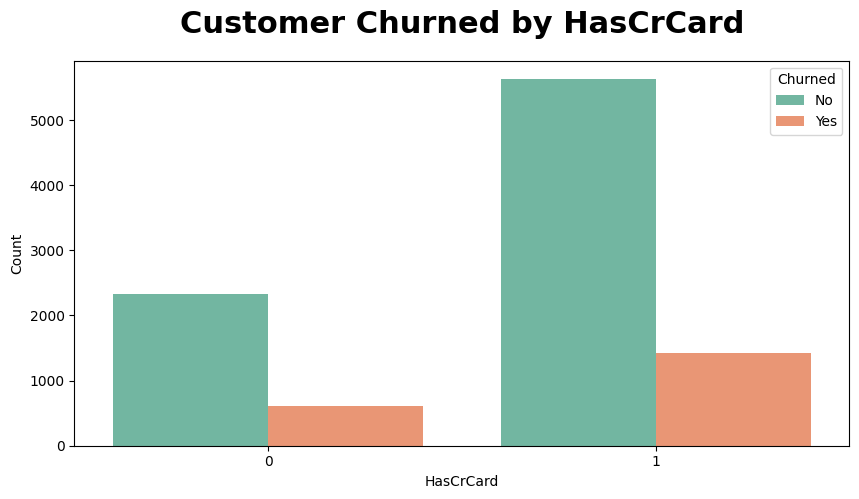

In [104]:
countplot_by_churn("HasCrCard")

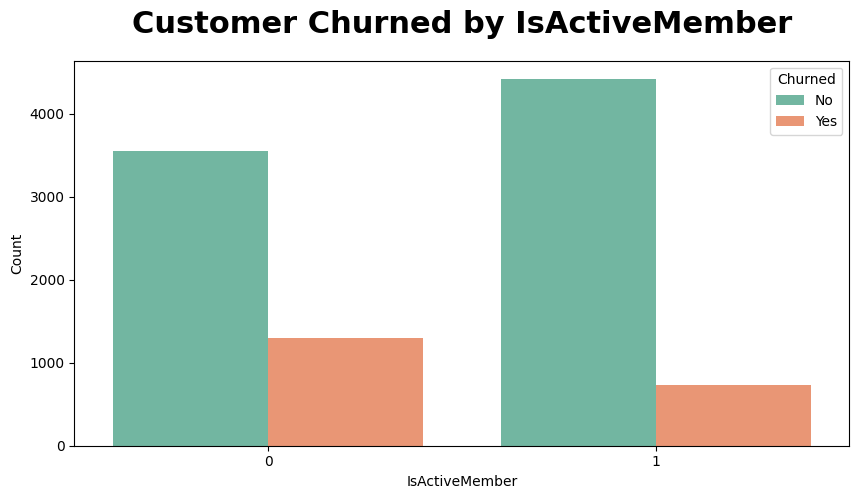

In [105]:
countplot_by_churn("IsActiveMember")

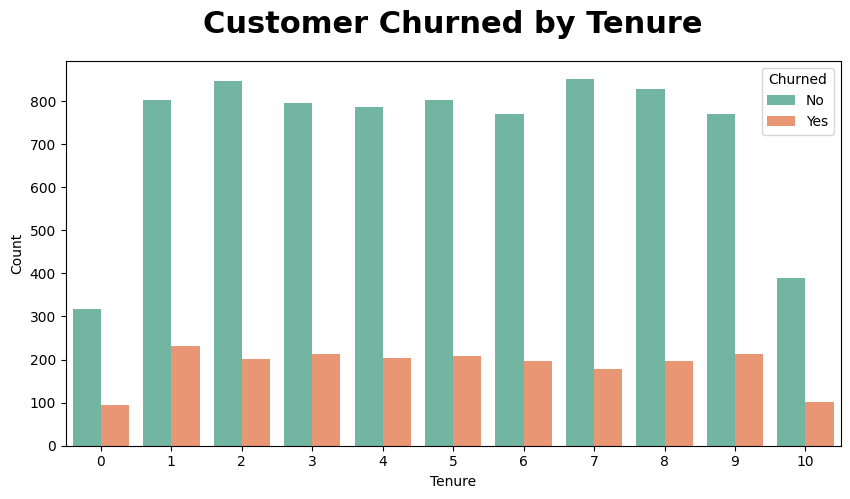

In [106]:
countplot_by_churn("Tenure")

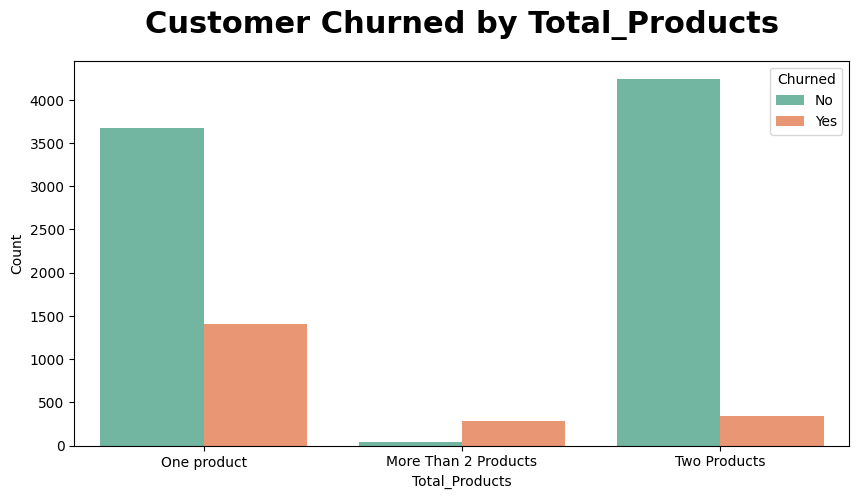

In [107]:
countplot_by_churn("Total_Products")

In [111]:
# Define a function for creating a continuous variable plot
def continuous_plot_by_churn(column):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 2)
    sns.boxplot(x="Exited", y=column, data=df, palette="Set2")
    plt.title(f"{column} Distribution by Churn Status", fontweight="bold", pad=20, size=15)
    plt.xlabel("Churned")
    plt.ylabel(column)
    plt.tight_layout()
    plt.show()


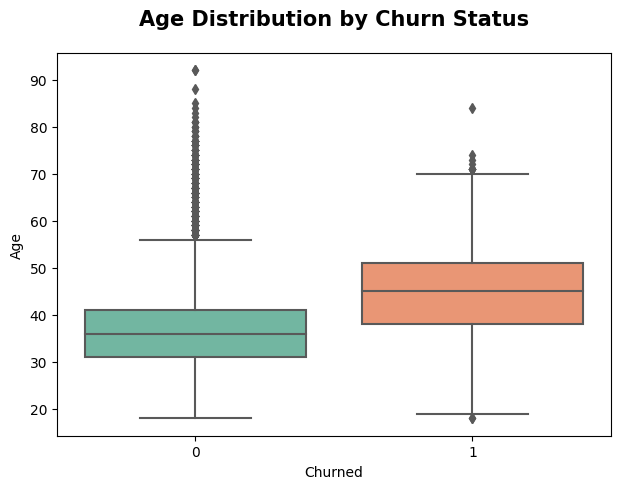

In [112]:

# Call the function with the desired continuous variable
continuous_plot_by_churn("Age")

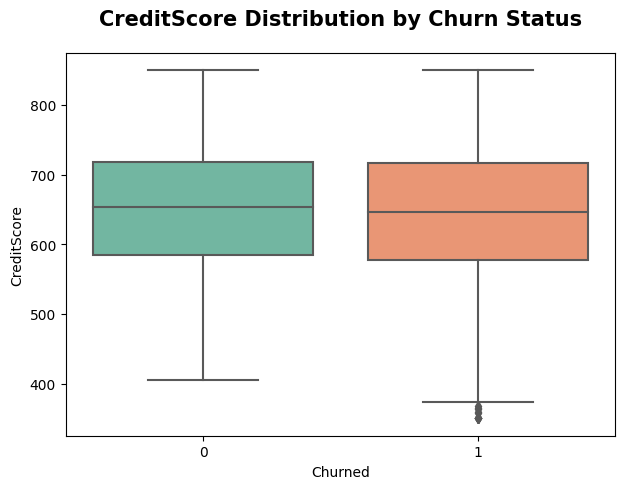

In [113]:
continuous_plot_by_churn("CreditScore")

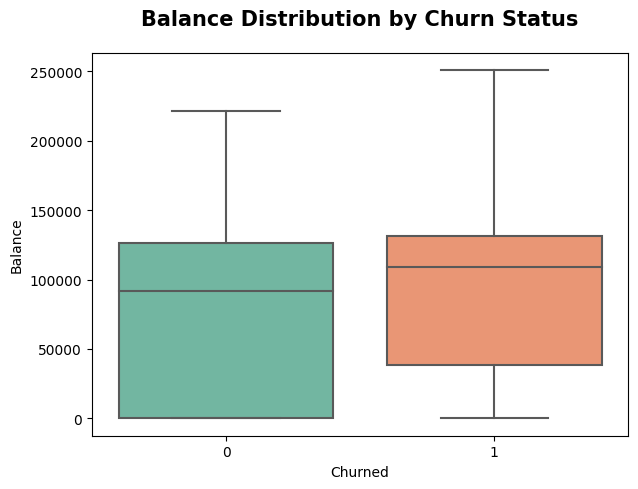

In [114]:
continuous_plot_by_churn("Balance")

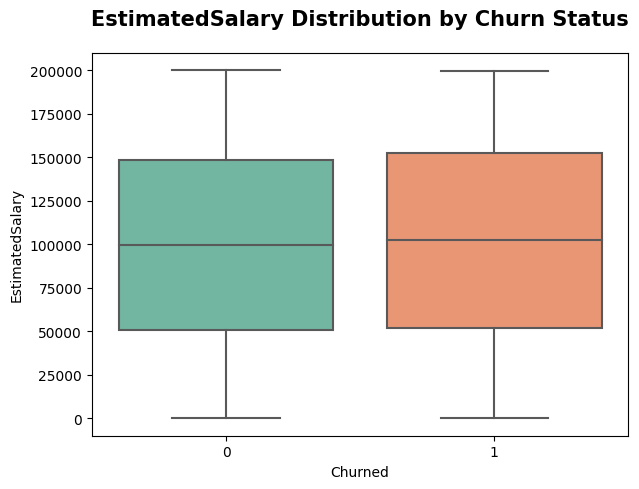

In [115]:
continuous_plot_by_churn("EstimatedSalary")

In [118]:
data = df.corr()
data

<ipython-input-118-c31b835074e3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = df.corr()


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.014858,-0.010084,0.012797,0.118533
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.016571,-0.006248,-0.027094,0.285323,-0.014001,0.118533,-0.007138,-0.156128,0.012097,1.000000


<ipython-input-122-8b955e67558f>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  hm = sns.heatmap(data=dataframe.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)


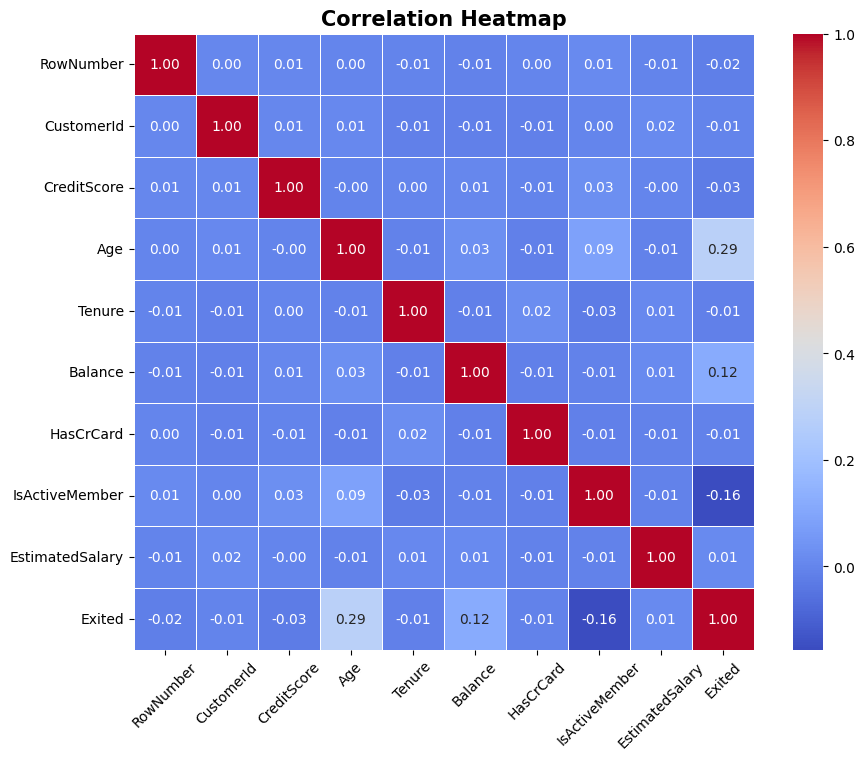

In [122]:
# Create a heatmap of the correlation matrix
def create_correlation_heatmap(dataframe):
    plt.figure(figsize=(10, 8))
    hm = sns.heatmap(data=dataframe.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title("Correlation Heatmap", fontweight="bold", size=15)
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.show()

# Call the function with your DataFrame
create_correlation_heatmap(df)


#  **6. PCA**

##  **6.1 Data Scaling**

In [123]:
# Create a function to apply label encoding to all columns
def label_encode_columns(dataframe):
    le = LabelEncoder()
    for col in dataframe.columns:
        dataframe[col] = le.fit_transform(dataframe[col])
    return dataframe

# Call the function with your DataFrame
data_encoded = label_encode_columns(df)

In [126]:
# Create a PCA pipeline
pca = PCA(n_components=0.95)  # Retain 95% of variance
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', pca)
])

# Apply the PCA pipeline to the data
X_transformed = pipeline.fit_transform(data)

# X_transformed now contains the transformed data after scaling and PCA


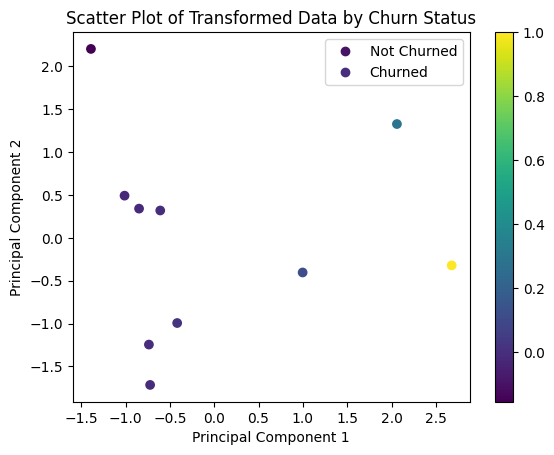

In [128]:
# Create a scatter plot of PCA-transformed data
scatter_plot = plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=data["Exited"], cmap='viridis')
plt.colorbar(scatter_plot)

# Set legend labels and show the plot
legend_labels = ['Not Churned', 'Churned']
plt.legend(handles=scatter_plot.legend_elements()[0], labels=legend_labels)
plt.title("Scatter Plot of Transformed Data by Churn Status")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [129]:
Xt

array([[-8.47874641e-01,  3.40184550e-01, -4.13362879e-01,
        -8.08164401e-01,  2.75143327e+00,  5.69130070e-01,
        -7.18002330e-01, -2.77199070e-01, -7.44751357e-02,
         1.00753063e-16],
       [-6.08916621e-01,  3.18558680e-01,  1.58192666e+00,
        -1.81827855e+00, -3.12460785e-01, -1.71803569e+00,
         3.03026662e-01,  8.37945010e-01, -6.39912777e-02,
         1.00753063e-16],
       [-1.01149292e+00,  4.91540174e-01,  2.34604145e-01,
         1.89784541e+00, -5.45620751e-02, -1.64237154e+00,
        -6.31508973e-01, -1.44312791e+00, -5.97883493e-02,
         1.00753063e-16],
       [ 2.06095896e+00,  1.32657859e+00, -7.39673407e-01,
        -5.25078560e-01, -7.02778839e-01,  2.40837360e-01,
        -4.33229544e-01, -4.18342926e-01, -1.25042313e+00,
         1.00753063e-16],
       [-7.23152363e-01, -1.71520924e+00, -9.42202032e-01,
         2.79769127e-02, -9.07342083e-01,  1.10870535e-01,
        -1.93047119e+00,  1.15595990e+00, -3.91389985e-02,
         1.

## **6.2 Feature Selection**

In [130]:
x = data.drop(columns=["Exited"])
y = data["Exited"]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25)


In [139]:
X=df.drop(columns=['Exited','Balance','EstimatedSalary',"Age","CreditScore"])
Y=df['Exited']

In [140]:
chi_scores=chi2(X,Y)

In [141]:
chi_scores

(array([4.57729689e+03, 6.53974336e+02, 5.56133225e+02, 1.18532506e+01,
        5.15399263e+01, 3.27053797e+00, 1.50040970e-01, 1.18199414e+02,
        2.77010943e+02, 3.72041908e+02]),
 array([0.00000000e+000, 3.05334179e-144, 5.83146756e-123, 5.75607838e-004,
        7.01557451e-013, 7.05344899e-002, 6.98496209e-001, 1.56803624e-027,
        3.36492723e-062, 6.72373733e-083]))

<Axes: >

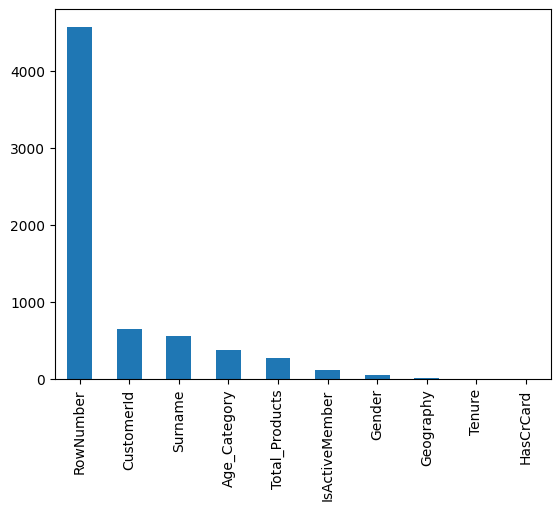

In [142]:
chi_values=pd.Series(chi_scores[0],index=X.columns)
chi_values.sort_values(ascending=False,inplace=True)
chi_values.plot.bar()

## **6.3 Class Imbalance Handling**

In [150]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Load your preprocessed dataset (replace "your_dataset.csv" with your actual dataset filename)
# df = pd.read_csv("your_dataset.csv")

# Separate features and target variable
X = df.drop(columns=['Exited'])
y = df['Exited']

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize SMOTE with a specified random state
smt = SMOTE(random_state=42)

# Perform oversampling on the training data
x_train_resampled, y_train_resampled = smt.fit_resample(x_train, y_train)

# Display the shape of resampled data
print("Resampled X shape:", x_train_resampled.shape)
print("Resampled y shape:", y_train_resampled.shape)

# Display the counts of each class after resampling
class_counts_resampled = y_train_resampled.value_counts().to_frame()
print(class_counts_resampled)


Resampled X shape: (12712, 14)
Resampled y shape: (12712,)
   Exited
0    6356
1    6356


## **6.4 Model Training & Prediction**

In [159]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Initialize the DecisionTreeClassifier
dtree = DecisionTreeClassifier()

# Define the parameter grid for hyperparameter tuning
param_grid = {
    "max_depth": [3, 4, 5, 6, 7, 8, 9, 10],
    "min_samples_split": [2, 3, 4, 5, 6, 7, 8],
    "min_samples_leaf": [1, 2, 3, 4, 5, 6, 7, 8],
    "criterion": ["gini", "entropy"],
    "splitter": ["best", "random"],
    "max_features": ["auto", None],
    "random_state": [0, 42]
}

# Initialize GridSearchCV with DecisionTreeClassifier and parameter grid
grid_search = GridSearchCV(dtree, param_grid, cv=5, n_jobs=-1)

# Perform grid search and fit to resampled training data
grid_search.fit(x_train_resampled, y_train_resampled)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Estimator:", best_estimator)


KeyboardInterrupt: ignored

In [157]:
best_parameters = grid_search.best_params_
print("The best Parameters for DecisionTree Model:")
for param, value in best_parameters.items():
    print(f"{param}: {value}")


AttributeError: ignored

In [156]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the DecisionTreeClassifier with best parameters
dtree = DecisionTreeClassifier(**best_parameters)

# Fit the model to the resampled training data
dtree.fit(x_train_resampled, y_train_resampled)


NameError: ignored

In [155]:
from sklearn.metrics import accuracy_score

# Predict using the trained model on the testing data
y_test_pred = dtree.predict(x_test)

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_test_pred)
print(f"Accuracy Score of Model on Testing Data: {round(accuracy * 100, 2)}%")


NotFittedError: ignored

In [154]:
from sklearn.metrics import f1_score, recall_score, precision_score

# Calculate and print the F1 Score, Recall Score, and Precision Score
f1 = f1_score(y_test, y_test_pred, average="micro")
recall = recall_score(y_test, y_test_pred, average="micro")
precision = precision_score(y_test, y_test_pred, average="micro")

print(f"F1 Score of the Model: {f1:.4f}")
print(f"Recall Score of the Model: {recall:.4f}")
print(f"Precision Score of the Model: {precision:.4f}")


NameError: ignored

In [153]:
# Create a DataFrame for feature importance
imp_df = pd.DataFrame({
    "Feature Name": x_train.columns,
    "Importance": dtree.feature_importances_
})

# Sort features by importance in descending order
features = imp_df.sort_values(by="Importance", ascending=False)

# Create a bar plot to visualize feature importance
plt.figure(figsize=(10, 7))
sns.barplot(x="Importance", y="Feature Name", data=features, palette="Reds_r")
plt.title("Feature Importance in the Model Prediction", fontweight="bold", size=20, pad=20)
plt.xlabel("Importance")
plt.ylabel("Feature Name")
plt.xticks(size=12)
plt.yticks(size=12)
plt.show()


NotFittedError: ignored

In [158]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(data=cm, linewidths=0.5, annot=True, fmt="g", cmap="Set2")
plt.title("Model Evaluation using Confusion Matrix", fontsize=20, pad=20, fontweight="bold")
plt.ylabel("Actual Labels")
plt.xlabel("Predicted Labels")
plt.show()


NameError: ignored